In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

## CARGA DE DATOS

In [9]:
img_data = 'C:\\Users\\Santiago Jaramillo\\Desktop\\Datasets tesis\\G1_Profundidades 2\\Data\\images_original'

In [10]:
BATCH_SIZE=8
TARGET_SIZE=224 # Based on EfficientNetB0
NUM_CLASSES=10

In [46]:
train_data_set= image_dataset_from_directory(
  img_data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=32)

Found 999 files belonging to 10 classes.
Using 700 files for training.


In [47]:
validation_data_set = image_dataset_from_directory(
  img_data,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=32)

Found 999 files belonging to 10 classes.
Using 299 files for validation.


In [48]:
class_names = train_data_set.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


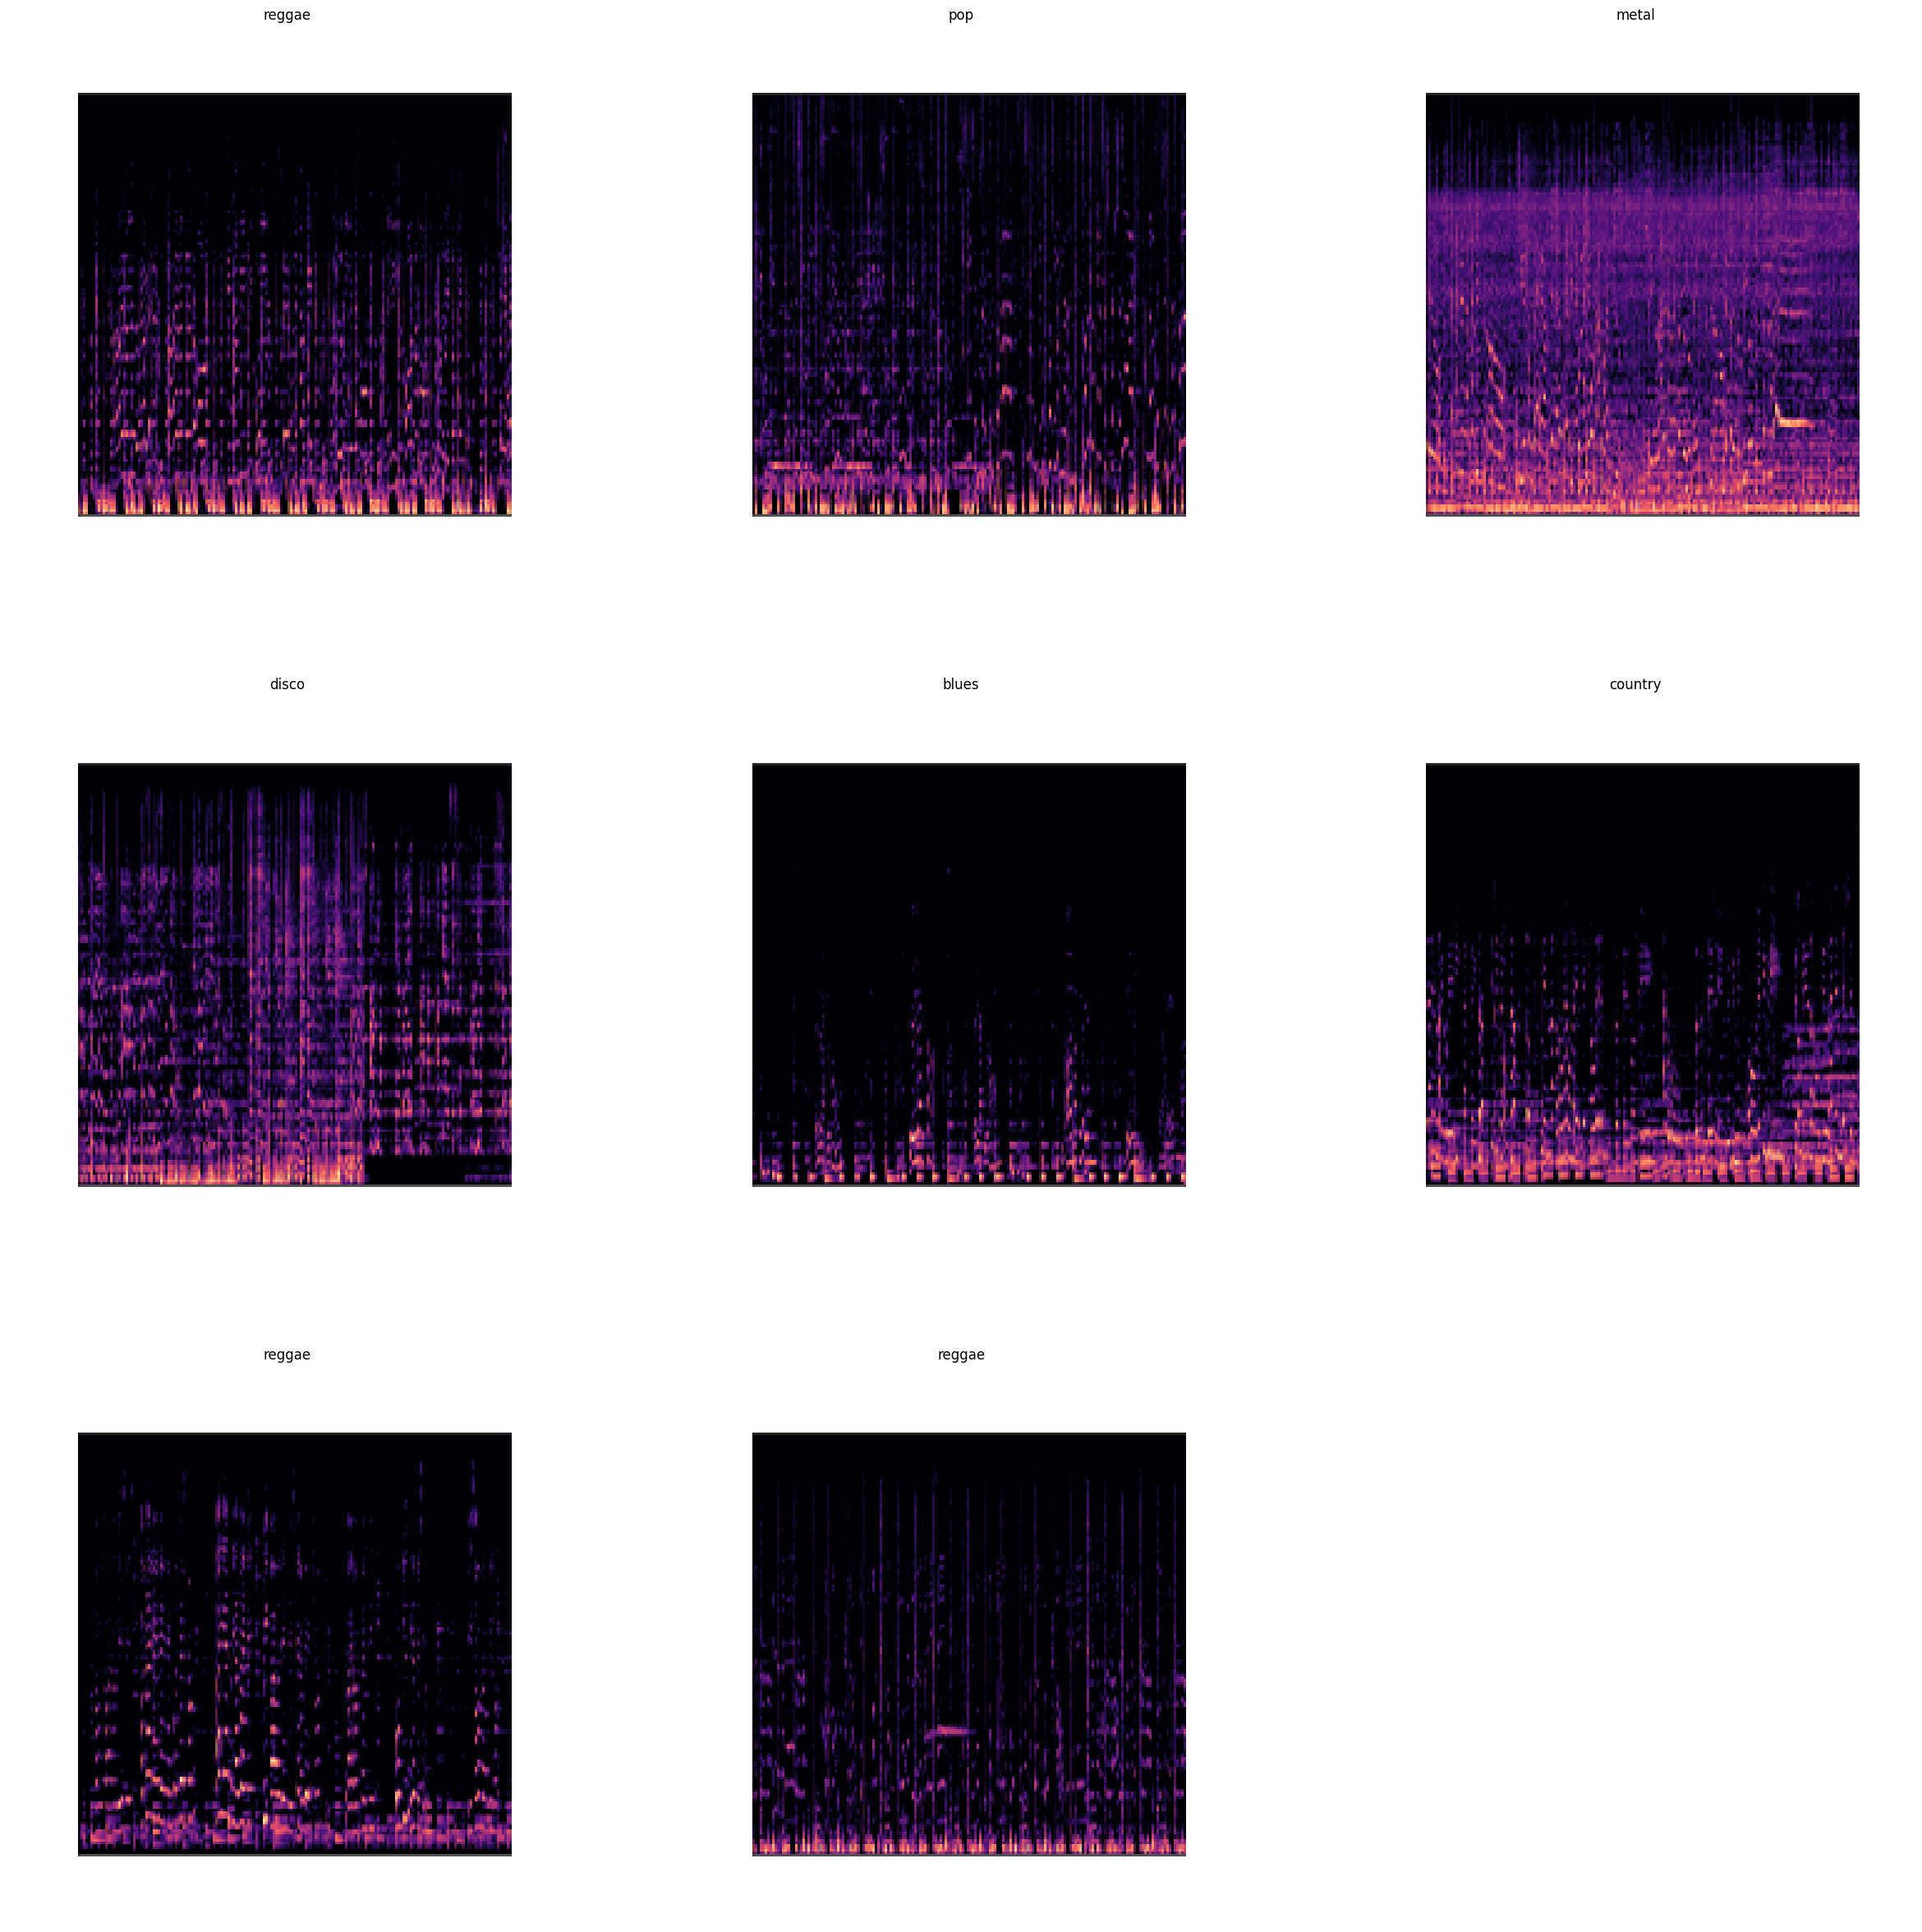

In [49]:
plt.figure(figsize=(30, 30))
for images, labels in train_data_set.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [50]:
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)

In [51]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

In [52]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [53]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 56, 56, 64)       

In [55]:

history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=30,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30



Epoch 1: val_loss improved from inf to 2.23381, saving model to .\best_weights.h5
22/22 - 8s - loss: 2.6407 - accuracy: 0.1329 - val_loss: 2.2338 - val_accuracy: 0.1906 - lr: 0.0010 - 8s/epoch - 370ms/step
Epoch 2/30

Epoch 2: val_loss improved from 2.23381 to 2.03153, saving model to .\best_weights.h5
22/22 - 6s - loss: 2.0809 - accuracy: 0.2343 - val_loss: 2.0315 - val_accuracy: 0.2140 - lr: 0.0010 - 6s/epoch - 272ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.03153 to 1.83109, saving model to .\best_weights.h5
22/22 - 6s - loss: 1.8547 - accuracy: 0.3357 - val_loss: 1.8311 - val_accuracy: 0.3712 - lr: 0.0010 - 6s/epoch - 270ms/step
Epoch 4/30

Epoch 4: val_loss improved from 1.83109 to 1.71874, saving model to .\best_weights.h5
22/22 - 6s - loss: 1.6189 - accuracy: 0.4443 - val_loss: 1.7187 - val_accuracy: 0.3746 - lr: 0.0010 - 6s/epoch - 263ms/step
Epoch 5/30

Epoch 5: val_loss improved from 1.71874 to 1.50887, saving model to .\best_weights.h5
22/22 - 6s - loss: 1.4784 - a

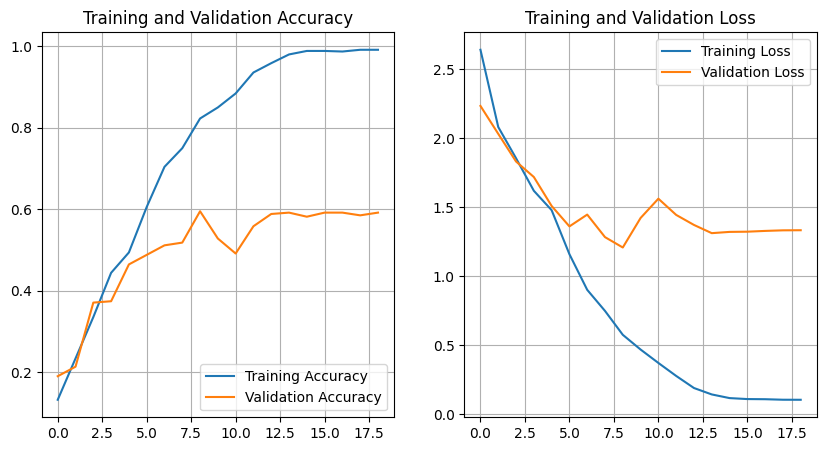

In [56]:
plot_hist(history)

CNN WITH DROUTPUT

In [28]:
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [29]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)       

In [31]:

history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=30,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/40

Epoch 1: val_loss did not improve from 1.39628
88/88 - 12s - loss: 8.8193 - accuracy: 0.0729 - val_loss: 2.3003 - val_accuracy: 0.0970 - lr: 0.0010 - 12s/epoch - 133ms/step
Epoch 2/40

Epoch 2: val_loss did not improve from 1.39628
88/88 - 11s - loss: 2.3095 - accuracy: 0.0800 - val_loss: 2.3051 - val_accuracy: 0.0970 - lr: 0.0010 - 11s/epoch - 125ms/step
Epoch 3/40

Epoch 3: val_loss did not improve from 1.39628

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
88/88 - 11s - loss: 2.3089 - accuracy: 0.0971 - val_loss: 2.3092 - val_accuracy: 0.1338 - lr: 0.0010 - 11s/epoch - 125ms/step
Epoch 4/40

Epoch 4: val_loss did not improve from 1.39628
88/88 - 10s - loss: 2.3059 - accuracy: 0.0943 - val_loss: 2.3037 - val_accuracy: 0.0970 - lr: 3.0000e-04 - 10s/epoch - 109ms/step
Epoch 5/40

Epoch 5: val_loss did not improve from 1.39628

Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
88/88 - 10s - loss: 2.3024 - accuracy: 0.10

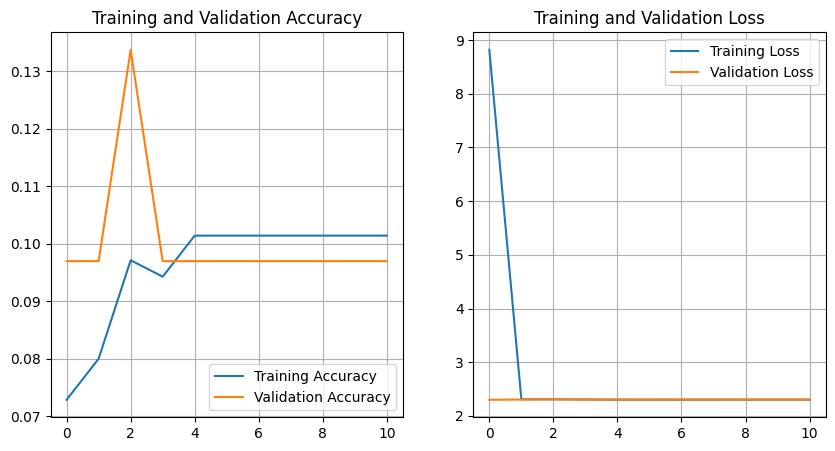

In [32]:
plot_hist(history)

Realizando pruebas sobre  las funciones de activacion 

In [38]:
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [39]:
model2.compile(optimizer=Adam(lr = 0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:

history = model2.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=30,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30



Epoch 1: val_loss did not improve from 1.39628
88/88 - 13s - loss: 2.3125 - accuracy: 0.0971 - val_loss: 2.3034 - val_accuracy: 0.0836 - lr: 0.0010 - 13s/epoch - 143ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.39628
88/88 - 10s - loss: 2.3029 - accuracy: 0.0929 - val_loss: 2.3046 - val_accuracy: 0.0836 - lr: 0.0010 - 10s/epoch - 116ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.39628

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
88/88 - 10s - loss: 2.3025 - accuracy: 0.0814 - val_loss: 2.3055 - val_accuracy: 0.0836 - lr: 0.0010 - 10s/epoch - 115ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.39628
88/88 - 10s - loss: 2.3018 - accuracy: 0.1071 - val_loss: 2.3058 - val_accuracy: 0.0836 - lr: 3.0000e-04 - 10s/epoch - 117ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.39628

Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
88/88 - 10s - loss: 2.3018 - accuracy: 0.1071 - val_lo

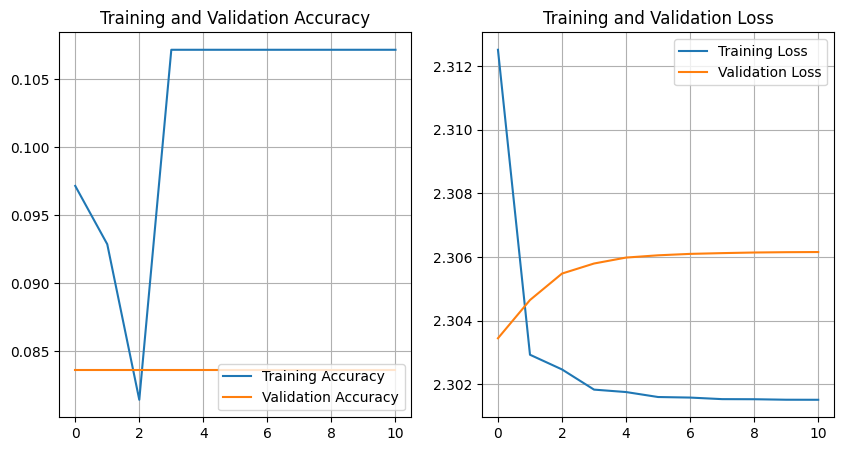

In [41]:
plot_hist(history)

In [ ]:
El los nodos convoluciionea esta funcionando mejor reducionado el numero de filtros de salida aplicados sobre clear_output

In [42]:
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(8, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(24, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [43]:
model3.compile(optimizer=Adam(lr = 0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
history3 = model3.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=30,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.39628
88/88 - 7s - loss: 2.2969 - accuracy: 0.1243 - val_loss: 2.1830 - val_accuracy: 0.1639 - lr: 0.0010 - 7s/epoch - 77ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.39628
88/88 - 5s - loss: 2.1400 - accuracy: 0.1900 - val_loss: 2.0845 - val_accuracy: 0.2408 - lr: 0.0010 - 5s/epoch - 59ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.39628
88/88 - 5s - loss: 2.0085 - accuracy: 0.2700 - val_loss: 2.0279 - val_accuracy: 0.3344 - lr: 0.0010 - 5s/epoch - 55ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.39628
88/88 - 5s - loss: 1.9159 - accuracy: 0.3129 - val_loss: 2.0216 - val_accuracy: 0.2542 - lr: 0.0010 - 5s/epoch - 54ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.39628
88/88 - 5s - loss: 1.8078 - accuracy: 0.3514 - val_loss: 1.9066 - val_accuracy: 0.3010 - lr: 0.0010 - 5s/epoch - 56ms/step
Epoch 6/30

Epoch 6: val_loss did not improve from 1.39628
88/88 - 5s - loss: 1.7243 - acc

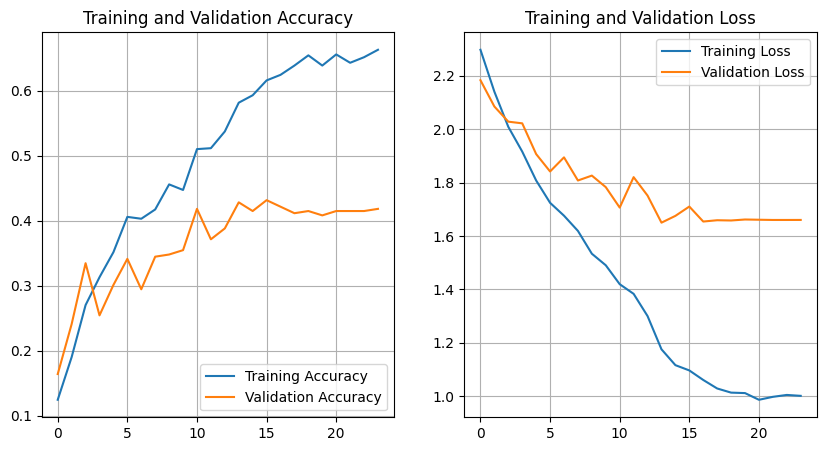

In [45]:
plot_hist(history3)

In [64]:
model4= Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(8, 3, padding='same', activation='selu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='selu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='selu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [65]:
model4.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
history4 = model4.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=30,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30



Epoch 1: val_loss did not improve from 1.20788
22/22 - 3s - loss: 4.3124 - accuracy: 0.1314 - val_loss: 2.1274 - val_accuracy: 0.2977 - lr: 0.0010 - 3s/epoch - 145ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.20788
22/22 - 2s - loss: 2.0407 - accuracy: 0.2657 - val_loss: 2.0595 - val_accuracy: 0.2575 - lr: 0.0010 - 2s/epoch - 108ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.20788
22/22 - 2s - loss: 1.9462 - accuracy: 0.2957 - val_loss: 1.9497 - val_accuracy: 0.2977 - lr: 0.0010 - 2s/epoch - 98ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.20788
22/22 - 2s - loss: 1.7807 - accuracy: 0.3943 - val_loss: 1.8985 - val_accuracy: 0.3311 - lr: 0.0010 - 2s/epoch - 98ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.20788
22/22 - 2s - loss: 1.6485 - accuracy: 0.4171 - val_loss: 1.7852 - val_accuracy: 0.3545 - lr: 0.0010 - 2s/epoch - 110ms/step
Epoch 6/30

Epoch 6: val_loss did not improve from 1.20788
22/22 - 2s - loss: 1.5232 - accuracy: 0

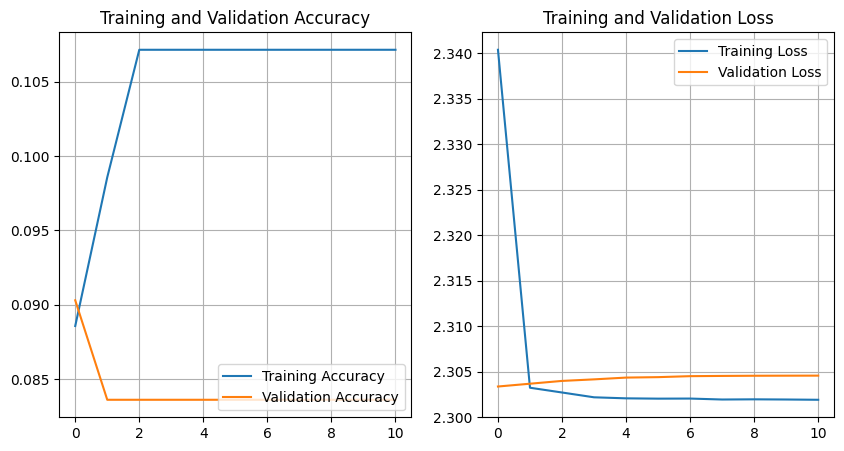

In [61]:
plot_hist(history4)